# Rozpoznawanie końcowej oceny studenta przy pomocy klasyfikacji

Projekt realizowany w ramach laboratorium z _Analizy Danych_ prowadzonych przez dr inż. Grzegorza Sarwasa.

## Opis postawionego problemu

Dane, które wykorzystujemy do realizacji projektu zostały utworzone w oparciu o ankiety, które wykonali uczniowie przedmiotów matematyka oraz język portugalski z różnych gimnazjów. Dane zawierają podstawowe informacje o uczniach jak ich płeć, wiek, adres zamieszkania, jak i te bardziej szczegółowe jak zawody rodziców czy osoba w rodzinie pilnująca, czy wybrany uczeń poświęca odpowiednio dużo czasu na naukę. 
Zadanie, które zostało nam postawione to z pomocą tych danych spróbować przewidzieć oceny końcowe osób za pomocą poznanych przez nas technik analizy danych.

## Określenie parametrów danych
Wyznaczenie liczby obiektów, liczby klas, zakress zmienności poszczególnych atrybutów, ich
wartości statystycznych, poziom wypełnienia kolumn, ilość unikalnych danych itp. 

Każda z kolumn zawiera jasno określone informacje o osobach, które brały udział w ankiecie. Kolumny te zawierają następujące informacje:
* **school** - szkoła, do której uczeń uczęszcza (binarnie: 'GP' - Gabriel Pereira lub 'MS' - Mousinho de Silveira).
* **sex** - płeć ucznia (binarnie: 'F' - kobieta lub 'M' - mężczyzna).
* **address** - typ miejsca zamieszkania ucznia (binarnie: 'U' - miejski lub 'R' - wiejski).
* **famsize** - liczba członków rodziny (binarnie: 'LE3' - mniej lub równo 3 lub 'GT3' - więcej niż 3).
* **Pstatus** - stan współżycia rodziców (binarnie: 'T' - rodzice żyją razem lub 'A' - oddzielnie).
* **Medu** - poziom edukacji matki (numerycznie: 0 - żaden, 1 - podstawowe wykształcenie (4-ta klasa), 2 - od 5-tej do 9-tej klasy, 3 - wykształcenie na poziomie gimnazjum lub 4 - wykształcenie wyższe niż wszystkie poprzednie). 
* **Fedu** - poziom edukacji ojca (numerycznie: 0 - żaden, 1 - podstawowe wykształcenie (4-ta klasa), 2 - od 5-tej do 9-tej klasy, 3 - wykształcenie na poziomie gimnazjum lub 4 - wykształcenie wyższe niż wszystkie poprzednie).
* **Mjob** - praca matki (symbolicznie: 'teacher' - nauczyciel, 'health' - związane z dbaniem o zdrowie, 'services' - służba cywilna (np. administracyjna lub polityczna), 'at_home' - zajmowanie się domem lub 'other' - inna).
* **Fjob** - praca ojca (symbolicznie: 'teacher' - nauczyciel, 'health' - związane z dbaniem o zdrowie, 'services' - służba cywilna (np. administracyjna lub polityczna), 'at_home' - zajmowanie się domem lub 'other' - inna).
* **reason** - powód wybrania danej szkoły (symbolicznie: 'home' - mieszkanie blisko szkoły, 'reputation' - dobra reputacja szkoły, 'course' - preferencje przedmiotowe lub 'other' - inny).
* **guardian** - osoba pilnująca czasu poświęconego na naukę przez ucznia (symobolicznie: 'mother' - matka, 'father' - ojciec, 'other' - inna).
* **traveltime** - czas podróży z domu do szkoły (numerycznie: 1 - poniżej 2 godzin, 2 - od 2 do 5 godzin, 3 - od 5 do 10 godzin lub 4 - powyżej 10 godzin).
* **studytime** - czas w tygodniu poświęcony na naukę (numerycznie: 1 - poniżej 2 godzin, 2 - od 2 do 5 godzin, 3 - od 5 do 10 godzin lub 4 - powyżej 10 godzin).
* **failures** - liczba oblanych w przeszłości klas (numerycznie: n, jeśli 1<=n<3, w przeciwnym wypadku 4).
* **schoolsup** - dodatkowe wsparcie edukacyjne (binarnie: 'yes' - tak, 'no' - nie).
* **famsup** - wsparcie edukacyjne rodziny (binarnie: 'yes' - tak, 'no' - nie).
* **paid** - dodatkowo płatne zajęcia w ramach wybranego przedmiotu (binarnie: 'yes' - tak, 'no' - nie).
* **activities** - zajęcia dodatkowe (binarnie: 'yes' - tak, 'no' - nie).
* **nursery** - czy dany uczeń uczęszczał do przedszkola (binarnie: 'yes' - tak, 'no' - nie).
* **higher** - czy dany uczeń chce uzyskać wykształcenie wyższe (binarnie: 'yes' - tak, 'no' - nie).
* **internet** - dostęp do internetu w domu (binarnie: 'yes' - tak, 'no' - nie).
* **romantic** - w związku uczuciowym z drugą osobą (binarnie: 'yes' - tak, 'no' - nie).
* **famrel** - kontakty z rodziną (numerycznie: od 1 - bardzo złe do 5 - bardzo dobre).
* **freetime** - czas wolny po zajęciach w szkole (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **goout** - ilość wyjść ze znajomymi (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **Dalc** - ilość wypitego alkoholu w dni powszednie (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **Walc** - ilość wypitego alkoholu w weekendy (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **health** - stan zdrowia ucznia (numerycznie: od 1 - bardzo słaby do 5 - bardzo dobry).
*  **absences** - ilość nieobecności w szkole (numerycznie: od 0 do 93).

### Przygotowanie środowiska

In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

### Wczytanie danych i przygotowanie do analizy
Wszystkie dane mają określone wartości. Nie trzeba więc usuwać żadnych obiektów.

In [20]:
df = pd.read_csv("student-por.csv")

liczbaBarkow = df.isnull().sum().sum()
print(f"Liczba brakujących danych: {liczbaBarkow}\n")

Liczba brakujących danych: 0



### Podstawowe parametry danych

Pokazanie podstawowych informacji o otrzymanych danych.

In [21]:
print(f"Liczba obiektów wynosi {df.shape[0]}.\n")

print(f"Każdy obiekt opisują {df.columns.size} atrybuty.")
print("3 ostatnie atrybuty to oceny, które należy wyznaczyć.")
print(f"Pozostaje więc {df.columns.size - 3} atrybutów do analizy.")

Liczba obiektów wynosi 649.

Każdy obiekt opisują 33 atrybuty.
3 ostatnie atrybuty to oceny, które należy wyznaczyć.
Pozostaje więc 30 atrybutów do analizy.


In [22]:
podstawoweAtrybuty = df.columns[1:-2]
podstawoweAtrybuty.size

30

### Usunięcie potencjalnych barków w danych

Wyszukanie braków w danych

In [9]:
df.isnull().sum().sum()

0

Nie ma brakujących danych, więc nie trzeba usuwać żadnych wierszy ani kolumn.

### Wyznaczenie zakresów zmienności poszczególnych atrybutów

Spróbujemy wyznaczyć zakresy zmiennności i inne dane opisujące atrybuty.

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


**Nie wszystkie atrybuty** są uwzględnione.  
Wyznaczymy, których kolumn brakuje.

In [11]:
poprawneKolumny = df.describe().columns

brakujaceKolumny = np.setdiff1d(df.columns, poprawneKolumny)

print("Lista brakujących kolumn")
brakujaceKolumny

Lista brakujących kolumn


array(['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize',
       'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex'], dtype=object)

Możliwe, że brakujące kolumny mają inny typ danych, które się w nich znajdują.
Przeanalizujmy typy wczytanych danych.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

Okazuje się, że brakujące dane są typu `object`. Sprawdzimy, czy zmiana na typ kategoryczny poprawi rezultaty.

In [13]:
for k in brakujaceKolumny:
    df[k] = df[k].astype('category')
    
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Ciągle nie ma kategorycznych kolumn. By to zmienić należy przypisać im **wartości liczbowe**.  
Dla każdego atrybutu trzeba wprowadzić mapowanie na wartości liczbowe.
Bez tego dalsza analiza tych atrybutów nie będzie możliwa.

In [14]:
schoolMap = {"GP": 0, "MS": 1}
df.school = df.school.map(schoolMap)

sexMap = {"F": 0, "M": 1}
df.sex = df.sex.map(sexMap)

addressMap = {"R": 0, "U": 1}
df.address = df.address.map(addressMap)

familySizeMap = {"LE3": 0, "GT3": 1}
df.famsize = df.famsize.map(familySizeMap)

parrentStatusMap = {"A": 0, "T": 1}
df.Pstatus = df.Pstatus.map(parrentStatusMap)

# Pracy rodziców nie da się tak łatwo zmapować
# Powodu wybrania szkoły nie da się tak łatwo zmapować
# Nie wiem o co chodzi z guardian

extraEducationalSupportMap = {"no": 0, "yes": 1}
df.schoolsup = df.schoolsup.map(extraEducationalSupportMap)

familyEducationalSupportMap = {"no": 0, "yes": 1}
df.famsup = df.famsup.map(familyEducationalSupportMap)

extraPaidClassesMap = {"no": 0, "yes": 1}
df.paid = df.paid.map(extraPaidClassesMap)

extraCurricularActivitiesMap = {"no": 0, "yes": 1}
df.activities = df.activities.map(extraCurricularActivitiesMap)

nurserryAtendanceMap = {"no": 0, "yes": 1}
df.nursery = df.nursery.map(nurserryAtendanceMap)

wantsToTakeHigherEducationMap = {"no": 0, "yes": 1}
df.higher = df.higher.map(wantsToTakeHigherEducationMap)

internetAccesMap = {"no": 0, "yes": 1}
df.internet = df.internet.map(internetAccesMap)

inRelationsheapMap = {"no": 0, "yes": 1}
df.romantic = df.romantic.map(inRelationsheapMap)

Teraz atrybuty kategoryczne również występują w liczbowym opisie wartości.  
Większość parametrów nie opisuje dobrze danych kategorycznych niektóre informacje da się jednak pozyskać dzięki takiemu rozkładowi.

In [15]:
display(df.describe().iloc[:, 0:14])
display(df.describe().iloc[:, 14:])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.35,0.41,16.74,0.70,0.70,0.88,2.51,2.31,1.57,1.93,0.22,0.10,0.61,0.06
std,0.48,0.49,1.22,0.46,0.46,0.33,1.13,1.10,0.75,0.83,0.59,0.31,0.49,0.24
min,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,16.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,17.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,0.00,0.00,1.00,0.00
75%,1.00,1.00,18.00,1.00,1.00,1.00,4.00,3.00,2.00,2.00,0.00,0.00,1.00,0.00
max,1.00,1.00,22.00,1.00,1.00,1.00,4.00,4.00,4.00,4.00,3.00,1.00,1.00,1.00


,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.49,0.80,0.89,0.77,0.37,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,0.50,0.40,0.31,0.42,0.48,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,0.00,1.00,1.00,1.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,1.00,1.00,1.00,1.00,1.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Zbadamy poszczególne atrybuty poprzez wyświetlenei histogramu dla każdego z nich.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18945630>,
      dtype=object)

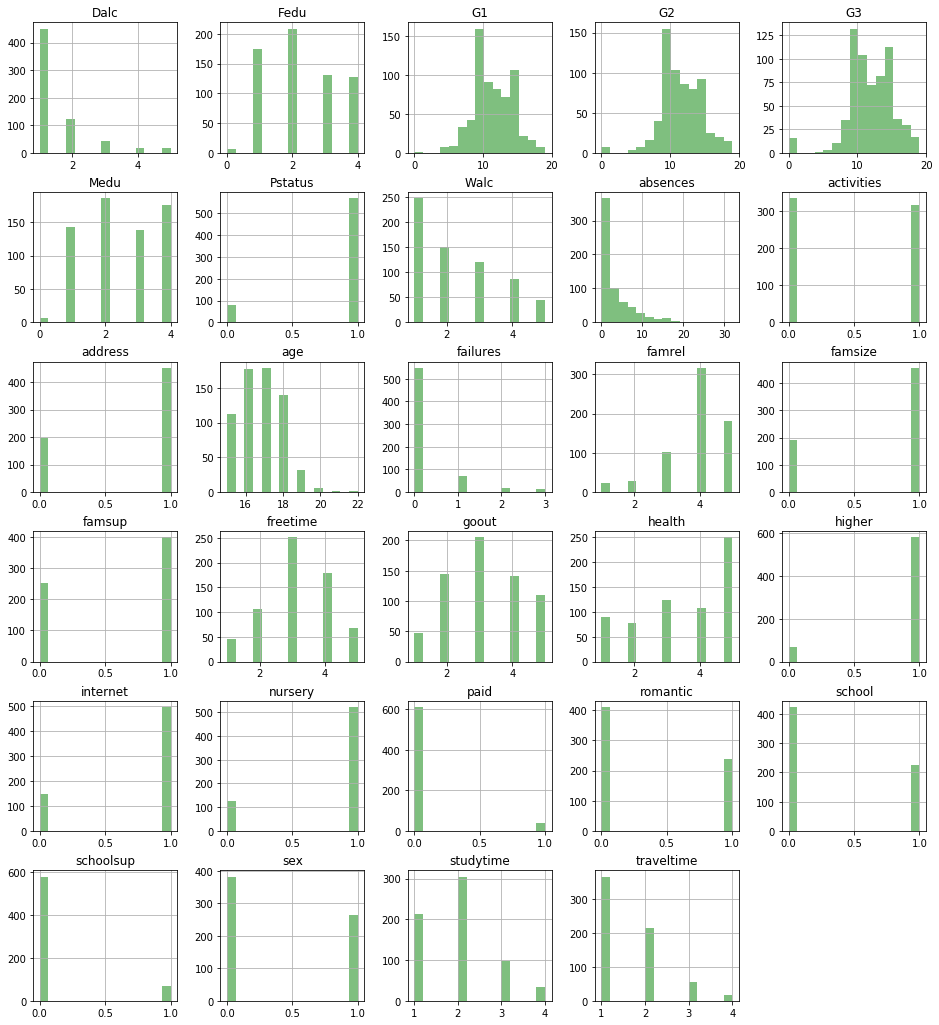

In [13]:
df.hist(color='g', alpha=0.5, bins=15, figsize = (16,18))

Jak widać histogramy atrybutów, które musieliśmy przekształcić na wartości liczbowe opierają się na binarnym podziale. Jesteśmy w stanie tutaj naocznie potwierdzić wyżej wymienione wnioski z analizy atrybutów. Należy również dodać, że bez odpowiedniej legendy z większości histogramów trudno odczytać informacje na temat danego atrybutu.

### Wnioski z analizy atrybutów

* Większość uczniów jest ze szkoły _Gabriel Pereira_
* Większość uczniów stanowią kobiety
* Wiek uczniów jest w okolicy 17 lat z odchyleniem standartowym około 1 roku

* Większość uczniów pochodzi z dużych rodzin
* Większość uczniów pochodzi z rodzin gdzie rodzice żyją razem
* Bardzo mała część uczniów uczęszcza na korepetycje
* Większości uczniów czas podróży z domu do szkoły wynosi mniej niż 2 godziny
* Większośći uczniów czas poświęcony na naukę wynosi od 2 do 5 godzin
* Około połowa ankietowanych uczniów uczęszcza na zajęcia dodatkowe pozaszkolne
* Znaczna większość uczniów uczęszczała w przeszłości do przedszkola
* Znaczna większość uczniów zamierza uzyskać wyższe wykształcenie
* Większość uczniów ma dostęp do internetu w domu
* Uczniowie mają przeważnie dobre stosunki z rodziną
* Uczniowie piją częściej w weekendy niż w dni powszednie
* Większość uczniów nie jest w związku z drugą osobą


Co ciekawe żaden uczeń nie otrzymał maksymalnej liczby punktów - 20

## Analiza korelacji między zmiennymi

Korelacja poszczególnych atrybutów

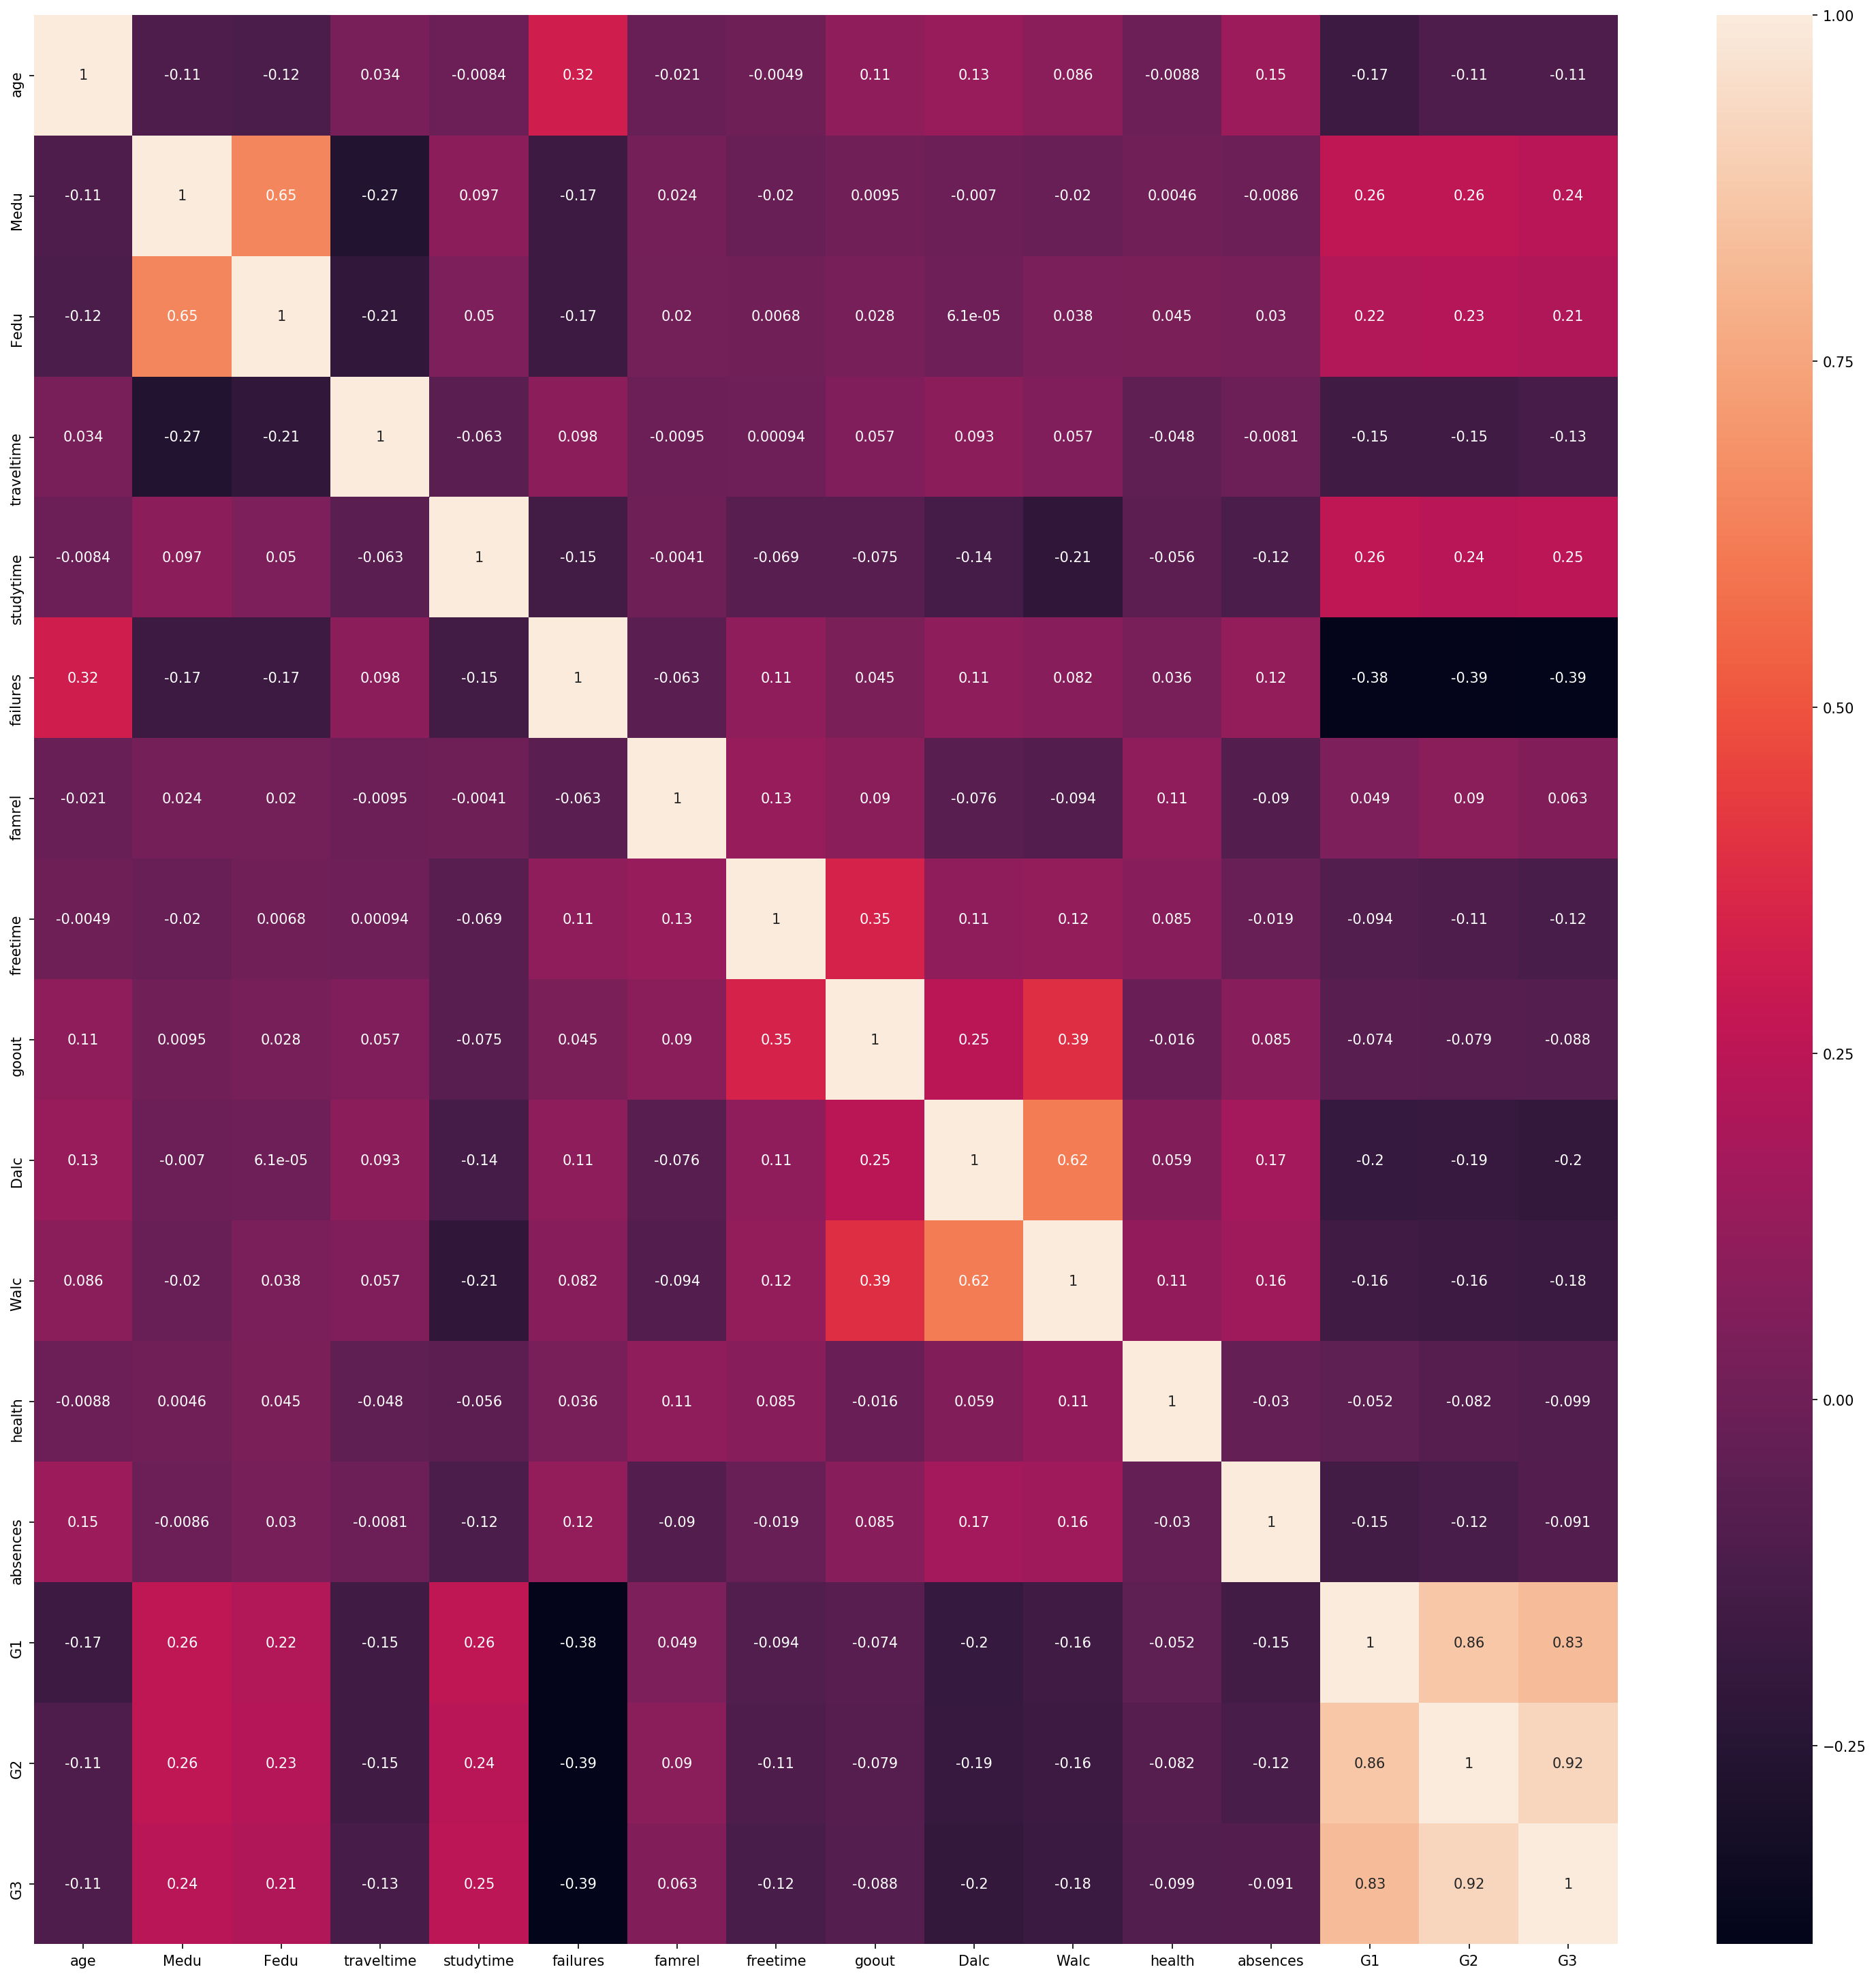

In [24]:
plt.figure(figsize=(25, 25), dpi = 150)
sns.heatmap(df.corr(), annot = df.corr())

Koralacja atybutów z ocenami

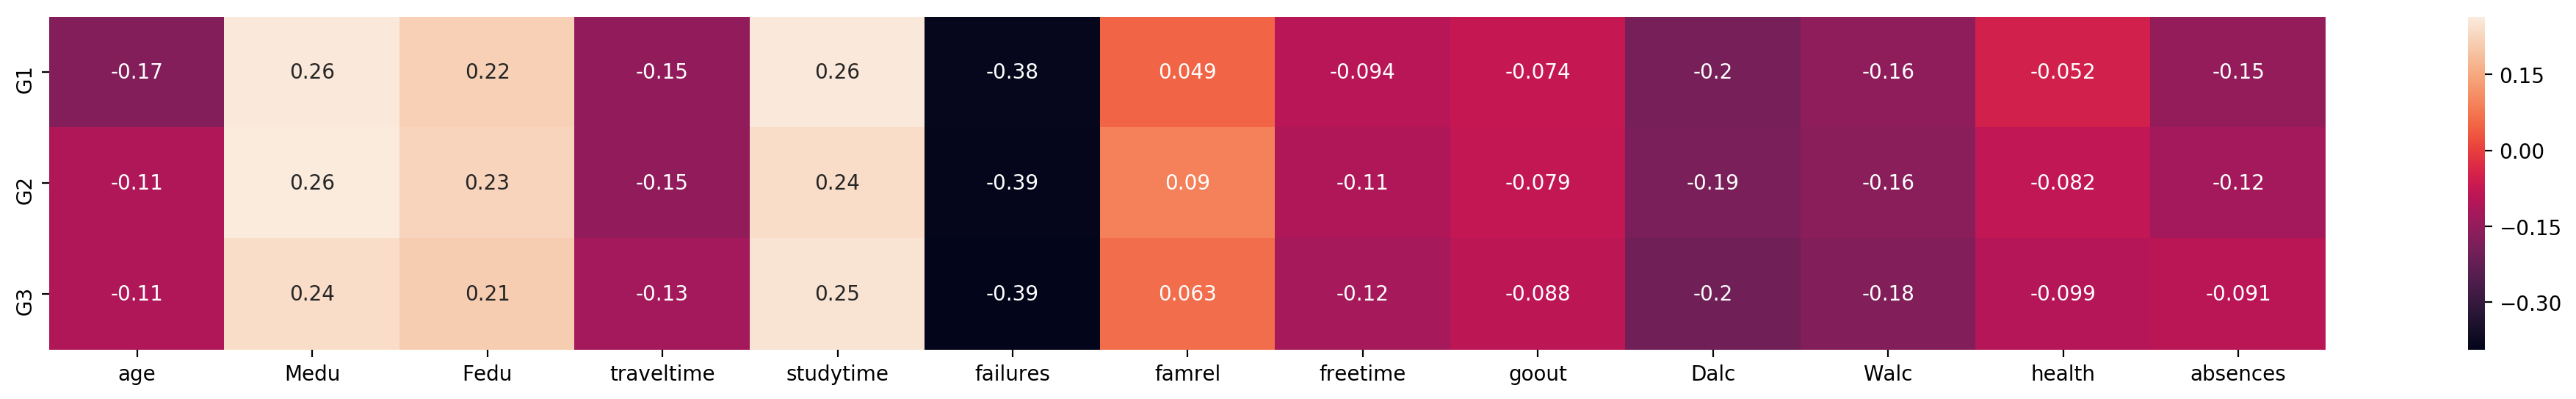

In [25]:
kolrelacjeOcen = df.corr().iloc[-3:, :-3]

plt.figure(figsize=(25, 3), dpi = 200)
sns.heatmap(kolrelacjeOcen, annot = kolrelacjeOcen)

Upożądkowanie atrybutów pod kątem ich wpływu na oceny

In [26]:
corelacjeAtrybutow = kolrelacjeOcen.mean()

posortowaneAtrybuty = corelacjeAtrybutow.abs().sort_values(ascending=False)
posortowaneAtrybuty = pd.DataFrame(posortowaneAtrybuty, columns=["Korelacja z ocenami"])
posortowaneAtrybuty.index.name = "Atrybut"

posortowaneAtrybuty.head(10)

,Korelacja z ocenami
Atrybut,
failures,0.39
Medu,0.25
studytime,0.25
Fedu,0.22
Dalc,0.20
Walc,0.17
traveltime,0.15
age,0.13
absences,0.12


Jak możemy zauważyć największy wpływ na oceny ma liczba oblanych w przeszłości klas. Następnym z kolei atrybutem znaczącym jest zamiar uzyskania wyższego wykształcenia przez uczniów. Te dwa atrybuty w największym stopniu wpływają na oceny, ponieważ bardzo często uczniowie, którzy oblewają klasy mają stosunek olewczy do ocen, natomiast uczniowie, którzy zamierzają kontynuować kształcenie - wręcz przeciwnie. <br>
Następny atrybut to szkoła, do której uczeń uczęszcza, oraz czas poświęcony na naukę. Przewidzieliśmy, że te atrybuty będą wpływały w znacznym stopniu na ocenę, ponieważ są z nią ściśle powiązane. <br>
Ciekawym jest wpływ wyższego wykształcenia matki oraz ojca. Można z niego wywnioskować, że wykształceni rodzice znacznie bardziej zwracają uwagę na dobre stopnie swojego dziecka.

### Zbadanie korelacji między atrybutami znaczącymi

Wyznaczenie korelacji między atrybutami skorelowanymi z oceną pozwoli odrzucić mocno skorelowane atrybuty przy budowie modelu, ponieważ reprezentują podobną cechę.

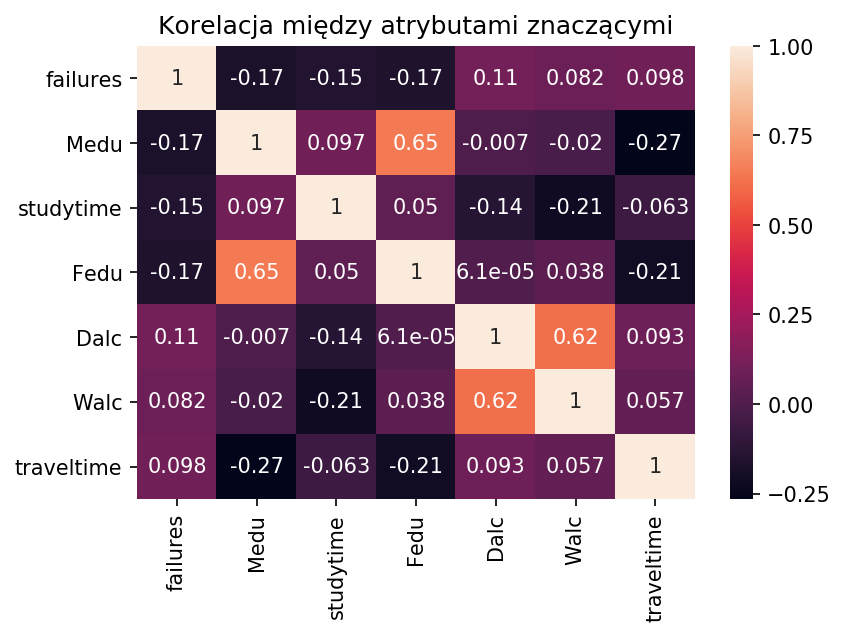

In [27]:
atrybutyZnaczace = list(list(posortowaneAtrybuty.index[:7]))

plt.figure(dpi=150)
plt.title("Korelacja między atrybutami znaczącymi")
sns.heatmap(df[atrybutyZnaczace].corr(), annot=df[atrybutyZnaczace].corr())

Jedyna wyraźna korelacja między atrybutami znaczącymi jest pomiędzy edukacją matki i ojca.

Co ciekawe **czas nauki** nie jest skorelowany z innymi parametrami. Zaprzecza to hipotezie, że to czas nauki jest głównym czynnikiem wpływającym na ocenę.

TODO: Opisać więcej o realiach

## Wybór parametrów znaczących

Z fragmentu macierzy koralcji przedstawionego powyżej wynika, że największy wpływ na oceny mają  
**TODO:** UAKTUALNIĆ ZE WSZYSTKIMI ATRYBUTAMI
* Ilość oblanych przedmiotów
* Chęć pójścia na studia
* Szkoła, do której uczeń chodzi
* Edukacja matki
* Czas poświęcony na naukę
* Edukacja ojca
* Ilość sporzywanego alkocholu w dni robocze **TODO:** Może zrobić kategoryczny czy powyżej X?

Natomiast następujące parametry mają znikomy wpływ na oceny
* Relacje rodzinne TODO: Też można zobaczyć czy bardzo złe relacje nie mają wpływu
* Stan zdrowia
* Częstotliwość wyjść ze znajomymi

## Analiza potencjanlnych grupowań

**Bardzo długi czas wykonania**

In [28]:
dfObciety = df[atrybutyZnaczace + [df.columns[-1]]]

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


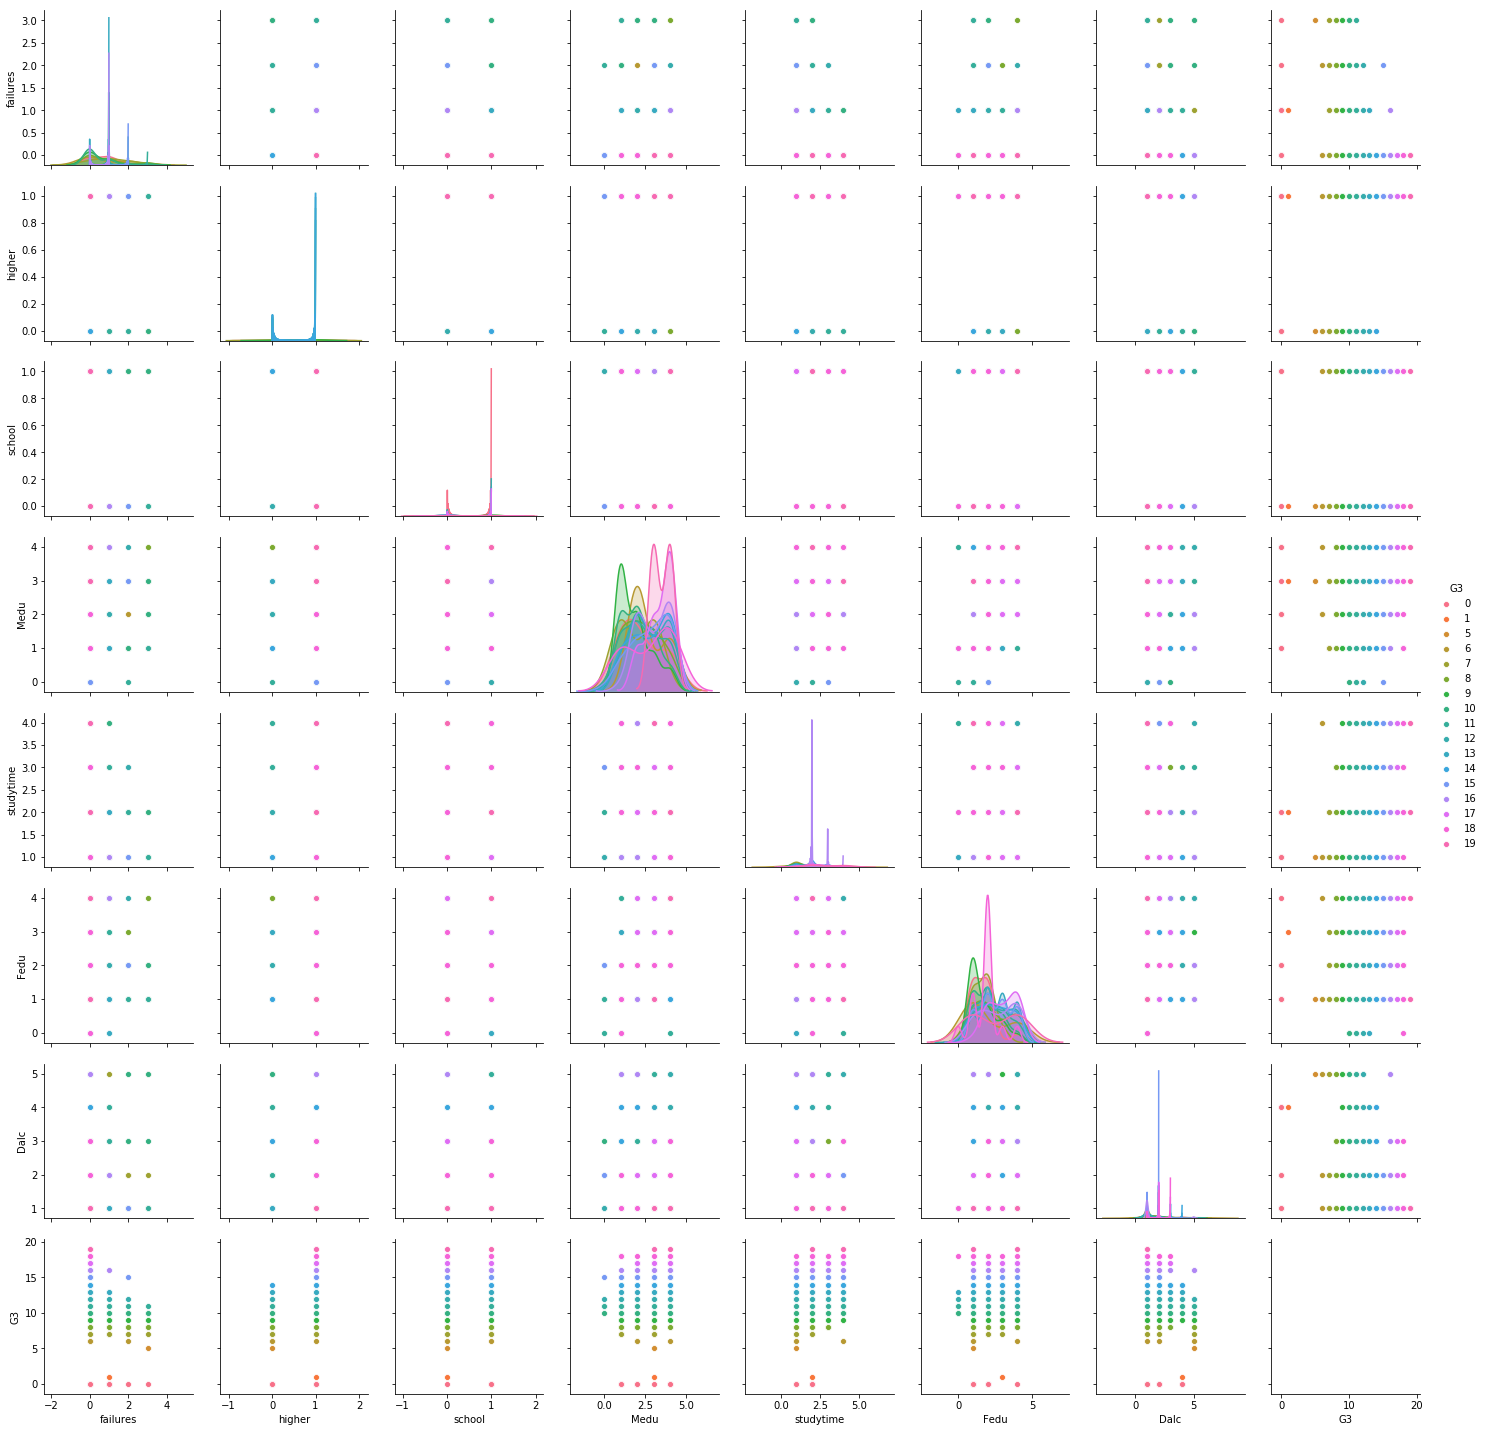

In [34]:
dfObciety = df[atrybutyZnaczace + [df.columns[-1]]]

sns.pairplot(dfObciety, kind="scatter", hue=dfObciety.columns[-1])

## Testy wybranych klasyfikatorów

Utworzenie przydatnych funkcji

In [74]:
def podziel(df, proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def wyswietlMacierzePomylek(dane, wynikiUczacego, wynikiTestoweg):
    print("Macierz pomyłek dla zbioru uczącego")
    display(pd.crosstab(dane["dec_ucz"], wynikiUczacego)) 
    print("Macierz pomyłek dla zbioru testowego")
    display(pd.crosstab(dane["dec_test"], wynikiTestoweg)) 
    
def wyswietlRoznice(wartosciPrawdziwe, wartosciPrzewidziane):
    # Wyświetla różnicę dla pojedyńczego zestawu danych
    roznice = pd.DataFrame({"Wartość prawdziwa": wartosciPrawdziwe, "Wartość przewidziana": wartosciPrzewidziane})
    roznice["Różnica"] = np.abs(roznice.iloc[:, 0] - roznice.iloc[:, 1])
    display(roznice)
    display(roznice["Różnica"].describe())
    
def wyswietlRozniceOdPrawdziwejWartosci(dane, wynikiUczacego, wynikiTestoweg):
    # Wyświetla różnicę dla danych testowych i uczących
    print("Różnice dla zbioru uczącego")
    wyswietlRoznice(dane["dec_ucz"].values, wynikiUczacego)    
    
    print("Różnice dla zbioru testowego")
    wyswietlRoznice(dane["dec_test"].values, wynikiTestoweg)
    

def weryfikuj(model, dane, atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].loc[:, atryb], dane["dec_ucz"])
    
    wynik_ucz = model.predict(dane["opis_ucz"].loc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].loc[:, atryb])
    
    wyswietlMacierzePomylek(dane, wynik_ucz, wynik_test)
    wyswietlRozniceOdPrawdziwejWartosci(dane, wynik_ucz, wynik_test)

### Podział zbioru danych

W celu werifikacji poprawności klasyfikacji podzieliliśmy zbór danych na zbiór uczący i testowy w proporcji 80/20.

In [34]:
dane = podziel(dfObciety, 0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  519
Liczba obiektów zbioru testowego:  130


In [72]:
model = GaussianNB()
atryb = atrybutyZnaczace

model.fit(dane["opis_ucz"].loc[:, atryb], dane["dec_ucz"])
    
wynik_ucz = model.predict(dane["opis_ucz"].loc[:, atryb])
wynik_test = model.predict(dane["opis_test"].loc[:, atryb])

wynik_test
dane["dec_ucz"]

dane["dec_test"].values
roznice = pd.DataFrame({"Wartość prawdziwa": dane["dec_test"].values, "Wartość przewidziana": wynik_test})
roznice["Różnica"] = np.abs(roznice.iloc[:, 0] - roznice.iloc[:, 1])
roznice["Różnica"].describe()

count   130.00
mean      4.38
std       2.71
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      11.00
Name: Różnica, dtype: float64

In [75]:
model = GaussianNB()

weryfikuj(model, dane, atrybutyZnaczace)
#weryfikuj(model, dane, range(len(atrybutyZnaczace)))

#TODO: Obliczenie względnej pomyłki

Macierz pomyłek dla zbioru uczącego


col_0,0,1,2,3,4,5,6,7,8,11,14,15,16
row_0,,,,,,,,,,,,,
0,1,0,0,0,1,0,1,6,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,5,0,2,0,0,1
5,0,0,0,0,0,4,0,6,2,5,0,0,7
6,1,0,0,0,1,0,2,5,1,11,1,0,5
7,2,0,0,0,2,1,5,19,0,26,2,3,21
8,1,0,0,0,1,0,3,5,2,32,3,0,34


Macierz pomyłek dla zbioru testowego


col_0,0,3,4,5,6,7,11,14,15,16
row_0,,,,,,,,,,
0,0,0,0,0,0,0,2,0,0,0
3,0,0,1,0,0,0,1,0,0,0
5,1,0,2,1,0,2,1,1,0,3
6,0,0,0,0,0,4,4,0,0,0
7,0,0,3,0,1,0,7,0,0,5
8,0,0,0,0,1,3,9,2,1,7
9,0,1,0,0,0,0,4,1,0,8
10,0,0,0,0,0,1,5,2,1,10
11,0,0,0,0,0,0,1,1,2,9


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,7,7,0
1,0,16,16
2,8,16,8
3,6,7,1
4,11,11,0
5,5,8,3
6,9,11,2
7,14,14,0
8,5,16,11
9,14,16,2


count   519.00
mean      4.26
std       2.97
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      16.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,6,7,1
1,12,16,4
2,3,11,8
3,13,16,3
4,9,16,7
5,8,11,3
6,5,4,1
7,9,11,2
8,10,16,6
9,11,16,5


count   130.00
mean      4.38
std       2.71
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      11.00
Name: Różnica, dtype: float64